<a href="https://colab.research.google.com/github/emanuel379/-Introdu-o-Ci-ncia-de-Dados/blob/main/ICD_Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from pandas import DataFrame
from sklearn.model_selection import cross_validate
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from scipy.spatial import distance
import statistics
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.linear_model import LogisticRegression

In [ ]:
from zipfile import ZipFile
file_name = 'data (4).zip'
with ZipFile(file_name, 'r') as zip:

    zip.printdir()


    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
data/                                          2020-11-16 23:34:20            0
__MACOSX/._data                                2020-11-16 23:34:20          177
data/houses_to_rent.csv                        2020-03-15 01:12:22       471498
__MACOSX/data/._houses_to_rent.csv             2020-03-15 01:12:22          426
data/Advertising.csv                           2019-09-26 05:11:42         4756
__MACOSX/data/._Advertising.csv                2019-09-26 05:11:42          426
data/breastcancer_test.csv                     2018-03-24 16:58:30         4762
__MACOSX/data/._breastcancer_test.csv          2018-03-24 16:58:30          389
data/.DS_Store                                 2020-11-16 23:34:52         6148
__MACOSX/data/._.DS_Store                      2020-11-16 23:34:52          120
data/breastcancer_training.csv                 2018-03-24 16:58:30         7892
__MACOSX/data/._breastcancer_training.cs

In [ ]:
# 1

df = pd.read_csv('data/iris.csv')
df1 = pd.read_csv('data/Vehicle.csv')

In [ ]:
# Encontrando o melhor k, aquele de maior acurácia, para determinar as regiões de separação

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Desvio Padrao: [1. 1. 1. 1.]


In [ ]:
# Treinando o classificador

p = 0.7
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

k = 5 # numero de vizinhos analizados
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test)

# Calculando a acurácia

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 1.0


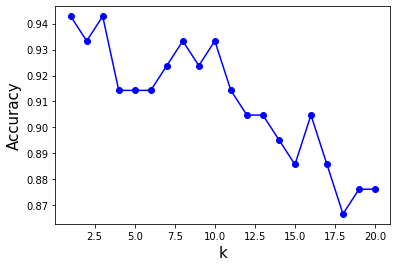

Melhor k: 1


In [ ]:
nkf = 5 #number of folds
vki = [] # armazena os valores de k
vscorei = []
for k in range(1, 21): # Valores que k deve assumir
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscorei.append(cv['test_score'].mean())
    vki.append(k)

plt.plot(vki, vscorei, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscorei)+1
print('Melhor k:', best_k)

In [ ]:
# Repetindo para o csv Vehicle

# Encontrando o melhor k, aquele de maior acurácia, para determinar as regiões de separação

data = df1.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Treinando o classificador

p = 0.7
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

k = 5 # numero de vizinhos analizados
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test)

# Calculando a acurácia

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7677165354330708


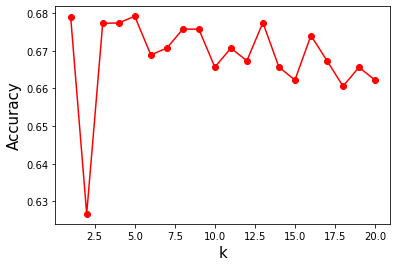

Melhor k: 5


In [ ]:
nkf = 5 #number of folds
vkv = [] # armazena os valores de k
vscorev = []
for k in range(1, 21): # Valores que k deve assumir
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscorev.append(cv['test_score'].mean())
    vkv.append(k)

plt.plot(vkv, vscorev, '-bo', color = 'red')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscorev)+1
print('Melhor k:', best_k)

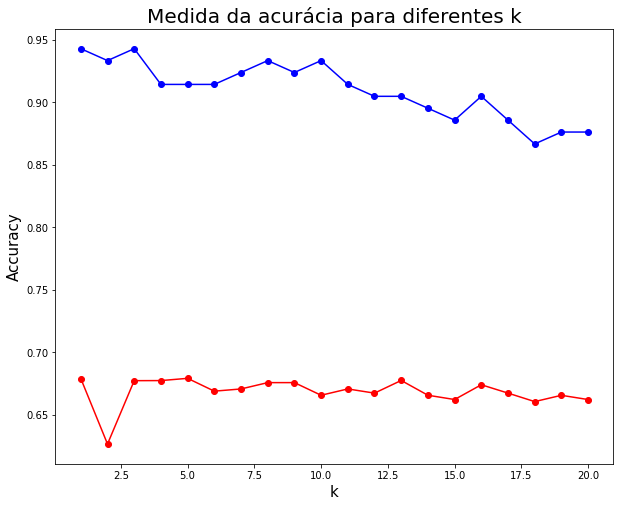

Melhor k para iris: 1
Melhor k para Vehicle: 5


In [ ]:
# Unindo ambos os gráficos

plt.figure(figsize = (10, 8))
plt.plot(vki, vscorei, '-bo', label = 'Acurácia da iris')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.plot(vkv, vscorev, '-bo', color = 'red', label = 'Acuracia Vehicle')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Medida da acurácia para diferentes k', fontsize = 20)
plt.show(True)
best_k = np.argmax(vscorei)+1
print('Melhor k para iris:', best_k)
best_k = np.argmax(vscorev)+1
print('Melhor k para Vehicle:', best_k)


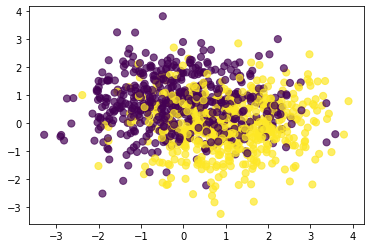

In [ ]:
# 2

plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

Classes: [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
Classification: 1


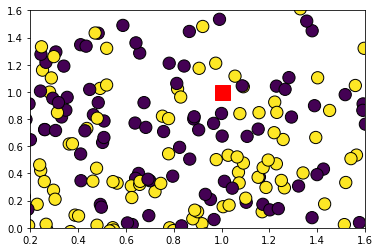

In [ ]:
def knn(x_train, y_train, x_test, k):
    distances = [] #lista que armazena as distâncias
    x1 = x_test # elemento a ser classificado
    for x2 in x_train: # distancia entre a observacao elementos no conjunto de teste
        dist = distance.euclidean(x1,x2)
        distances.append(dist)
    indices = []
    cl = []
    for i in range(0,21):
        ind = np.argmin(distances) #elemento no conjunto de teste mais proximo
        #print('distance:', distances[ind],'index:', ind, 'class:', y_train[ind])
        distances[ind] = np.max(distances)
        indices.append(ind)
        cl.append(y_train[ind]) #guarda a classe
    print("Classes:",cl)
    classification = statistics.mode(cl)# encontra a classe
    return classification

k=[] # numero de vizinhos
x_train = X
y_train = y
x_test = np.array([1,1])
# realiza a classificacao
cl = knn(x_train, y_train, x_test, k)
print("Classification:", cl)
# mostra os dados
plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="Red")
plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('knn.eps')

plt.show(True)

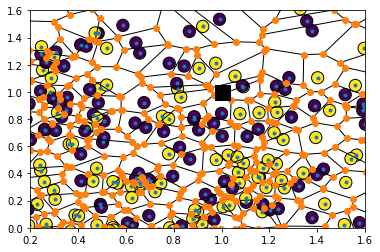

In [ ]:
vor = Voronoi(x_train)
voronoi_plot_2d(vor)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")

plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('voronoi.eps')
plt.show()

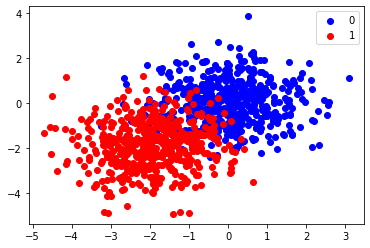

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


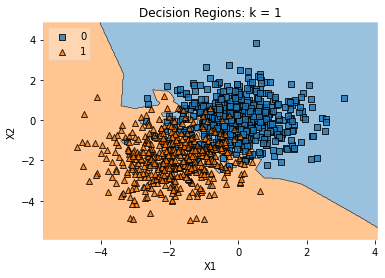

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


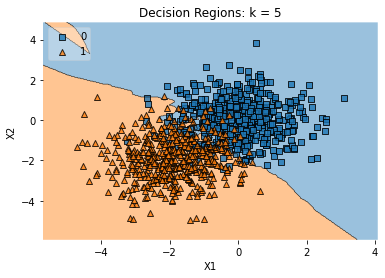

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


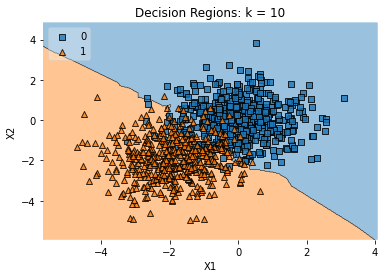

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


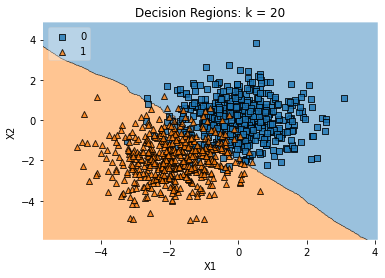

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


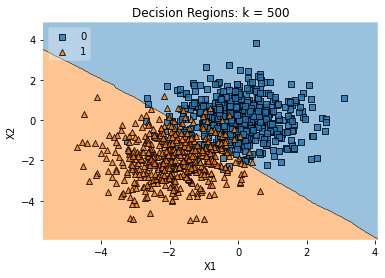

In [ ]:
# centro dos grupos
centers = [(0, 0), (-2, -2)]
X, y = skdata.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, centers=centers,
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['blue', 'red', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('knn_ex.eps')
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10,20,int(n_samples/2)]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    #plt.savefig('knn_' + str(k)+'.eps')
    plt.show()

In [ ]:
p = model.predict_proba(X)
print("Acurácia:", model.score(X, y))

Acurácia: 0.922


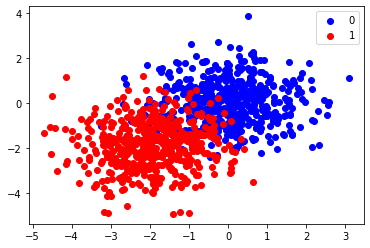

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


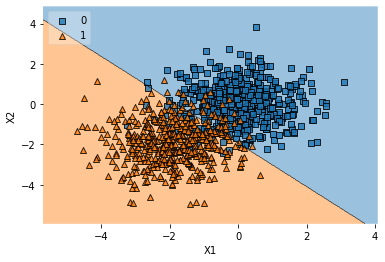

In [ ]:
# centro dos grupos
#centers = [(0, 0), (-2, -2), (2,0)]
centers = [(0, 0), (-2, -2)]
X, y = skdata.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, centers=centers,
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['blue', 'red', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('plot_ex.eps')
plt.legend()
plt.show()

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()


In [ ]:
p = model.predict_proba(X)
print("Acurácia:", model.score(X, y))

Acurácia: 0.92


In [ ]:
# 3

# Para iris
# Com regressão logística

df = pd.read_csv('data/iris.csv')

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.9333333333333333


In [ ]:
# Com knn

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

k = 5 # numero de vizinhos analizados
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test)

# Calculando a acurácia

score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 1.0


In [ ]:
# Para Vehicle
# Com regressão logística

df = pd.read_csv('data/Vehicle.csv')

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.7311669128508124


In [ ]:
# Com knn

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

k = 5 # numero de vizinhos analizados
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test)

# Calculando a acurácia

score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.7647058823529411
